In [1]:
from pandas import DataFrame

In [5]:
data = {
    "name":["andre","Bob","hiroyuki","jack"], # 列名がname,country,age
    "country":["US","canada","japan","UK"],
    "age":["12","34","26","31"]
}

df = DataFrame(data)
print(df)

       name country age
0     andre      US  12
1       Bob  canada  34
2  hiroyuki   japan  26
3      jack      UK  31


In [4]:
df

name country age
0     andre      US  12
1       Bob  canada  34
2  hiroyuki   japan  26
3      jack      UK  31

In [6]:
df = DataFrame(data, index=["one","two","three","four"]) # indexは行名

In [7]:
df

name country age
one       andre      US  12
two         Bob  canada  34
three  hiroyuki   japan  26
four       jack      UK  31

In [9]:
# 列の並びを変更する
sorted_df = DataFrame(data, columns=["country","age","name"])
sorted_df

country age      name
0      US  12     andre
1  canada  34       Bob
2   japan  26  hiroyuki
3      UK  31      jack

In [12]:
#値の取得
data_df = df.values
data_df

array([['andre', 'US', '12'],
       ['Bob', 'canada', '34'],
       ['hiroyuki', 'japan', '26'],
       ['jack', 'UK', '31']], dtype=object)

In [13]:
#　特定の列の取得
name =df["name"]
name

one         andre
two           Bob
three    hiroyuki
four         jack
Name: name, dtype: object

In [14]:
country =df["country"]
country

one          US
two      canada
three     japan
four         UK
Name: country, dtype: object

In [15]:
#　特定の行の取得
two = df.ix["two"]
two

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


name          Bob
country    canada
age            34
Name: two, dtype: object

In [16]:
# 列の編集
df["age"] = 50 # 全部一括で50が代入される
df

name country  age
one       andre      US   50
two         Bob  canada   50
three  hiroyuki   japan   50
four       jack      UK   50

In [17]:
# 特定の列削除
del df["country"]
df

name  age
one       andre   50
two         Bob   50
three  hiroyuki   50
four       jack   50

In [18]:
# 行と列の入れ替え
trans = df.T
trans

one  two     three  four
name  andre  Bob  hiroyuki  jack
age      50   50        50    50

In [3]:
# 要素数の異なるデータの追加

from pandas import Series


data2 = {
    "name":["andre","Bob","hiroyuki","jack"],
    "country":["US","canada","japan","UK"],
    "age":["12","34","26","31"]
}
df = DataFrame(data2)

less = Series(["a","b","c"])
df['less'] = less

df   # 足らない要素にはNanが追加されることがわかる

name country age less
0     andre      US  12    a
1       Bob  canada  34    b
2  hiroyuki   japan  26    c
3      jack      UK  31  NaN

In [4]:
#　欠損値の有無を確認する
df.isnull()

name  country    age   less
0  False    False  False  False
1  False    False  False  False
2  False    False  False  False
3  False    False  False   True

In [5]:
# 逆に欠損値が無いことを確認する
df.notnull()

name  country   age   less
0  True     True  True   True
1  True     True  True   True
2  True     True  True   True
3  True     True  True  False

In [9]:
# 欠損値を埋める
fillna_df = df.fillna(0)
fillna_df

name country age less
0     andre      US  12    a
1       Bob  canada  34    b
2  hiroyuki   japan  26    c
3      jack      UK  31    0

In [11]:
# 欠損値がある行を削除
drop = df.dropna()
drop

name country age less
0     andre      US  12    a
1       Bob  canada  34    b
2  hiroyuki   japan  26    c

In [12]:
# 行の要素全てが欠損値である場合にのみその行を削除
drop2 = df.dropna(how="all")
drop2

name country age less
0     andre      US  12    a
1       Bob  canada  34    b
2  hiroyuki   japan  26    c
3      jack      UK  31  NaN

In [15]:
# 欠損値を含む列を取り除く
drop =df.dropna(axis=1)
drop

name country age
0     andre      US  12
1       Bob  canada  34
2  hiroyuki   japan  26
3      jack      UK  31

In [16]:
# Seriesのソート 昇順
s = Series([3,8,5,1,7])
sort = s.sort_values()
sort

3    1
0    3
2    5
4    7
1    8
dtype: int64

In [18]:
# Seriesのソート 降順
sort_ascending = s.sort_values(ascending = False)
sort_ascending

1    8
4    7
2    5
0    3
3    1
dtype: int64

In [21]:
# DataFrameオブジェクトdfを、年齢ageの昇順(若い順)にソート

sort_by_age = df.sort_values(by="age", ascending=True)
sort_by_age

name country age less
0     andre      US  12    a
2  hiroyuki   japan  26    c
3      jack      UK  31  NaN
1       Bob  canada  34    b

In [26]:
# DataFrameオブジェクトを複数項目に対してソート
sort_by_age_country = df.sort_values(by=["age","country"], ascending=False)
sort_by_age_country

name country age less
1       Bob  canada  34    b
3      jack      UK  31  NaN
2  hiroyuki   japan  26    c
0     andre      US  12    a

In [28]:
#Seriesオブジェクト同士の演算
s1 = Series([1,2,3,4], index=["a","b","c","d"])
s2 = Series([1,3,4,5], index=["a","c","d","e"])

s3 = s1.add(s2)
s3
# index（行）名が一致hしないもの同士の演算はNanとなる

a    2.0
b    NaN
c    6.0
d    8.0
e    NaN
dtype: float64

In [31]:
# Seriesオブジェクトの計算で、インデックスが重複していない場合にはNaN値が代入されますが、
#任意の値を計算の初期値として与えることも可能です

s4=s1.add(s2, fill_value=0)
print(s4)

s4=s1.add(s2, fill_value=5)
print(s4)

a    2.0
b    2.0
c    6.0
d    8.0
e    5.0
dtype: float64
a     2.0
b     7.0
c     6.0
d     8.0
e    10.0
dtype: float64


In [32]:
#DataFrameオブジェクト同士の四則演算
df1 = DataFrame({
    "value1":[10,20,30,40],
    "value2":[1,2,3,4],
    "value3":[10,20,30,40]
})

df2 = DataFrame({
    "value1":[1,2,3,4],
    "value2":[2,4,8,16]
})

print(df1.add(df2, fill_value=0))
print(df1.sub(df2, fill_value=0))
print(df1.mul(df2, fill_value=0))
print(df1.div(df2, fill_value=0))

   value1  value2  value3
0      11       3    10.0
1      22       6    20.0
2      33      11    30.0
3      44      20    40.0
   value1  value2  value3
0       9      -1    10.0
1      18      -2    20.0
2      27      -5    30.0
3      36     -12    40.0
   value1  value2  value3
0      10       2     0.0
1      40       8     0.0
2      90      24     0.0
3     160      64     0.0
   value1  value2  value3
0    10.0   0.500     inf
1    10.0   0.500     inf
2    10.0   0.375     inf
3    10.0   0.250     inf


In [33]:
# Seriesオブジェクトの要素のうち、ユニークなもの(重複していない要素)を取り出す
s = Series([10,20,10,5,20,30,30,20])
uniq = s.unique()
print(uniq)

[10 20  5 30]


In [34]:
# ユニークな値の個数を取り出す
uniq = s.value_counts()
print(uniq)

20    3
30    2
10    2
5     1
dtype: int64


In [41]:
# 各列ごとの要素数を数える
df5 = DataFrame({
    "value1":[10,20,30,40],
    "value2":[1,2,3,4],
    "value3":[10,20,30,40]
})
cnt = df5.count()
cnt

value1    4
value2    4
value3    4
dtype: int64

In [43]:
# 最大値、最小値
print(df5.max())
print(df5.min())
#　各列の最大値、最小値がそれぞれ出力される

value1    40
value2     4
value3    40
dtype: int64
value1    10
value2     1
value3    10
dtype: int64


In [44]:
#　各カラム（列）の合計値
print(df5.sum())

value1    100
value2     10
value3    100
dtype: int64


In [47]:
# 各列の平均値
print(df5.mean())

value1    25.0
value2     2.5
value3    25.0
dtype: float64


In [49]:
# 各列（カラム）の中央値
print(df5.median())

value1    25.0
value2     2.5
value3    25.0
dtype: float64


In [50]:
# 各列の分散
print(df5.var())

value1    166.666667
value2      1.666667
value3    166.666667
dtype: float64


In [52]:
# 統計計算のメソッドの計算結果を一度に表示
print(df5.describe())

          value1    value2     value3
count   4.000000  4.000000   4.000000
mean   25.000000  2.500000  25.000000
std    12.909944  1.290994  12.909944
min    10.000000  1.000000  10.000000
25%    17.500000  1.750000  17.500000
50%    25.000000  2.500000  25.000000
75%    32.500000  3.250000  32.500000
max    40.000000  4.000000  40.000000


In [55]:
# CSVファイルの読み込み
import pandas as pd
df_read = pd.read_csv("data.csv")
print(df_read)

      name  age  value1  value2  value3  value4
0    Andre   24      10      20      30      40
1      Bob   45      25      50      75     100
2  Charlie   38      15      20      25      30
3      Dee   68     300     150      75      38
4    Elisa   32     100     200     300     400


In [56]:
# 特定の行を読み飛ばす
df_read_skip = pd.read_csv("data.csv", skiprows=[1])
print(df_read_skip)

      name  age  value1  value2  value3  value4
0      Bob   45      25      50      75     100
1  Charlie   38      15      20      25      30
2      Dee   68     300     150      75      38
3    Elisa   32     100     200     300     400


In [60]:
# csvの読み取りとその確認
df_read_skip.to_csv("out.csv")

with open("out.csv") as f:
    data = f.readlines()
    for line in data:
        print(line)

,name,age,value1,value2,value3,value4

0,Bob,45,25,50,75,100

1,Charlie,38,15,20,25,30

2,Dee,68,300,150,75,38

3,Elisa,32,100,200,300,400



In [64]:
#NaN値を含むDataFrameをCSVファイルに書き出す場合、NaN値は空欄,,として出力されます。
#また、空欄を含むCSVファイルを読み込む場合、空欄はNaN値として読み込まれます。
import numpy as np

df7 = DataFrame({
    "value1":[0,np.nan,0,0,0],
    "value2":[10,20,30,40,50],
    "value3":[100,100,np.nan,100,100]
})

df7.to_csv("outout.csv")

df8 = pd.read_csv("outout.csv")
df8


Unnamed: 0  value1  value2  value3
0           0     0.0      10   100.0
1           1     NaN      20   100.0
2           2     0.0      30     NaN
3           3     0.0      40   100.0
4           4     0.0      50   100.0

In [65]:
# 書き出し時のNaNの扱い
#nan値をNoneに替えて書き出す

df.to_csv("out_none.csv", na_rep="None")
with open("out_none.csv") as f:
    for i in f.readlines():
        print(i)
    

,name,country,age,less

0,andre,US,12,a

1,Bob,canada,34,b

2,hiroyuki,japan,26,c

3,jack,UK,31,None



In [69]:
# NoneをNaNとして読み込む
read = pd.read_csv("out_none.csv", na_values="None")
print(read)

   Unnamed: 0      name country  age less
0           0     andre      US   12    a
1           1       Bob  canada   34    b
2           2  hiroyuki   japan   26    c
3           3      jack      UK   31  NaN


In [78]:
# 数行ずつ読み込む
chunk = pd.read_csv("out_none.csv",chunksize=2)
print(chunk)
for row in chunk:
    print("-------------")
    print(row)
    print("-------------")

-------------
   Unnamed: 0   name country  age less
0           0  andre      US   12    a
1           1    Bob  canada   34    b
-------------
-------------
   Unnamed: 0      name country  age  less
2           2  hiroyuki   japan   26     c
3           3      jack      UK   31  None
-------------


In [79]:
# マージ　特定の列をキーにしてDataFrameをマージする
df00 = DataFrame({
    "name":["hiro","yamate","jonasan"],
    "age":["23","44","25"]
})

df11 = DataFrame({
    "name":["hiro","yamate","jonasan"],
    "country":["japan","taiwan","austraria"]
})

df22 = pd.merge(df00, df11, on="name")
print(df22)

      name age    country
0     hiro  23      japan
1   yamate  44     taiwan
2  jonasan  25  austraria


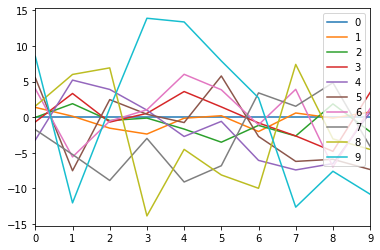

In [82]:
#　練習
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(10,10)*np.arange(10).reshape(-10,10)) # np.random.randn(10,10) 標準正規分布による 10x10 の行列
df.plot()

In [85]:
plt.show()

# データ操作　まとめ　発展　参考：https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a


In [87]:
df=pd.read_csv("lunch_box.csv", sep=",")

In [89]:
df.head()

datetime    y week  soldout        name  kcal remarks event  payday  \
0  2013-11-18   90    月        0    厚切りイカフライ   NaN     NaN   NaN     NaN   
1  2013-11-19  101    火        1     手作りヒレカツ   NaN     NaN   NaN     NaN   
2  2013-11-20  118    水        0  白身魚唐揚げ野菜あん   NaN     NaN   NaN     NaN   
3  2013-11-21  120    木        1      若鶏ピリ辛焼   NaN     NaN   NaN     NaN   
4  2013-11-22  130    金        1    ビッグメンチカツ   NaN     NaN   NaN     NaN   

  weather precipitation  temperature  
0      快晴            --         19.8  
1      快晴            --         17.0  
2      快晴            --         15.5  
3      快晴            --         15.2  
4      快晴            --         16.1

In [90]:
df.tail()

datetime   y week  soldout          name   kcal          remarks  \
202  2014-9-24  59    水        1   白身魚のマスタード焼き  408.0              NaN   
203  2014-9-25  50    木        0       牛カルビ焼き肉  394.0              NaN   
204  2014-9-26  45    金        0      ランチビュッフェ    NaN  スペシャルメニュー（800円）   
205  2014-9-29  56    月        1      豚肉と玉子の炒め  404.0              NaN   
206  2014-9-30  40    火        0  鶏肉とカシューナッツ炒め  398.0              NaN   

             event  payday weather precipitation  temperature  
202            NaN     NaN       曇             0         24.8  
203            NaN     NaN       曇             0         25.4  
204  キャリアアップ支援セミナー     NaN      晴れ            --         27.1  
205            NaN     NaN      快晴            --         26.6  
206            NaN     NaN      快晴            --         28.1

In [94]:
print(df.shape) #次元を確認

(207, 12)


In [96]:
print(df.index) #行確認

RangeIndex(start=0, stop=207, step=1)


In [97]:
df.columns #列名を確認

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [98]:
# 特定の列だけ取り出したい場合
df[["name","kcal"]].head()

name  kcal
0    厚切りイカフライ   NaN
1     手作りヒレカツ   NaN
2  白身魚唐揚げ野菜あん   NaN
3      若鶏ピリ辛焼   NaN
4    ビッグメンチカツ   NaN

In [100]:
#特定の行から行まで表示したい場合
df[100:200]

datetime    y week  soldout             name   kcal       remarks  \
100  2014-4-22   78    火        1            マーボ豆腐  382.0           NaN   
101  2014-4-23   63    水        0          手作りひれかつ  340.0           NaN   
102  2014-4-24   56    木        1         鶏の照り焼きマヨ  360.0           NaN   
103  2014-4-25   80    金        0              中華丼    NaN      お楽しみメニュー   
104  2014-4-28   54    月        0         タンドリーチキン  342.0           NaN   
105  2014-4-30   97    水        1         豚味噌メンチカツ  368.0           NaN   
106   2014-5-1   64    木        0            マーボ茄子  415.0           NaN   
107   2014-5-2   47    金        0            鶏の天ぷら  420.0           NaN   
108   2014-5-7   88    水        1             肉じゃが  415.0           NaN   
109   2014-5-8   59    木        0            メンチカツ  405.0           NaN   
110   2014-5-9   58    金        1         手作りチキンカツ  434.0           NaN   
111  2014-5-12   73    月        0      きのこソースハンバーグ  400.0           NaN   
112  2014-5-13   70    火        1      白身魚唐揚げ野菜餡かけ  428.0           NaN   
113  2014-5-14   64    水        1            メンチカツ  430.0           NaN   
114  2014-5-15   58    木        1         タンドリーチキン  403.0           NaN   
115  2014-5-16  126    金        0           ポークカレー    NaN      お楽しみメニュー   
116  2014-5-19   70    月        1      豚肉と茄子のピリ辛炒め  406.0           NaN   
117  2014-5-20   71    火        0         鶏の味噌漬け焼き  425.0           NaN   
118  2014-5-21  104    水        1         チーズハンバーグ  430.0           NaN   
119  2014-5-22   54    木        1   サーモンのムニエル2色ソース  428.0  料理長のこだわりメニュー   
120  2014-5-23   65    金        0           牛肉コロッケ  400.0           NaN   
121  2014-5-26   77    月        1      鶏のカッシュナッツ炒め  430.0           NaN   
122  2014-5-27   79    火        0          牛肉すき焼き風  423.0           NaN   
123  2014-5-28   74    水        1      鶏の唐揚げおろしソース  414.0           NaN   
124  2014-5-29   64    木        1            いか天ぷら  438.0           NaN   
125  2014-5-30  119    金        0           チキンカレー    NaN      お楽しみメニュー   
126   2014-6-2   74    月        0   ハンバーグケッチャップソース  420.0           NaN   
127   2014-6-3   59    火        0        ゴーヤチャンプルー  418.0           NaN   
128   2014-6-4   47    水        0      たっぷりベーコンフライ  424.0           NaN   
129   2014-6-5   64    木        1         鶏の味噌漬け焼き  405.0           NaN   
..         ...  ...  ...      ...              ...    ...           ...   
170   2014-8-4   75    月        1  ハンバーグ（デミきのこバター）  410.0           NaN   
171   2014-8-5   54    火        1         鶏肉のカレー唐揚  400.0           NaN   
172   2014-8-6   58    水        1           豚キムチ炒め  410.0           NaN   
173   2014-8-7   63    木        0  チキン香草焼きマスタードソース  415.0           NaN   
174   2014-8-8  129    金        0           チキンカレー    NaN      お楽しみメニュー   
175  2014-8-11   45    月        0     サーモンフライ・タルタル  411.0           NaN   
176  2014-8-12   40    火        1           厚切ハムカツ  400.0           NaN   
177  2014-8-18   56    月        0      洋食屋さんのメンチカツ  396.0           NaN   
178  2014-8-19   53    火        1            牛スキヤキ  385.0           NaN   
179  2014-8-20   56    水        0    豚ロースのピザ風チーズ焼き  423.0  料理長のこだわりメニュー   
180  2014-8-21   54    木        0            チキン南蛮  405.0           NaN   
181  2014-8-22  100    金        1            ロコモコ丼    NaN      お楽しみメニュー   
182  2014-8-25   55    月        0         白身魚の南部焼き  412.0           NaN   
183  2014-8-26   68    火        0           キーマカレー  400.0           NaN   
184  2014-8-27   62    水        0          カレイの唐揚げ  410.0           NaN   
185  2014-8-28   56    木        0         豚肉の胡麻シャブ  396.0           NaN   
186  2014-8-29   39    金        0        チキンの辛味噌焼き  398.0           NaN   
187   2014-9-1   65    月        1          ビーフシチュー  380.0           NaN   
188   2014-9-2   68    火        1          名古屋味噌カツ  440.0         手作りの味   
189   2014-9-3   53    水        0              親子煮  408.0           NaN   
190   2014-9-4   54    木        1   チキンステーキ・きのこソース  405.0           NaN   
191   2014-9-5   43    金       

In [101]:
# index(行)が100の行だけ取得したい場合
df.iloc[100]

datetime         2014-4-22
y                       78
week                     火
soldout                  1
name                 マーボ豆腐
kcal                   382
remarks                NaN
event                  NaN
payday                 NaN
weather                  曇
precipitation           --
temperature           18.8
Name: 100, dtype: object

In [107]:
# 1,2,4 行目と 0-2 列目を取得
df.iloc[[1,2,4],[0,2]]

datetime week
1  2013-11-19    火
2  2013-11-20    水
4  2013-11-22    金

In [108]:
# 条件を指定して抽出
df[df["kcal"] > 450]

datetime    y week  soldout        name   kcal remarks event  payday  \
29    2014-1-8  128    水        0      豚肉の生姜焼  462.0     NaN   NaN     NaN   
45   2014-1-31   92    金        1      メダイ照り焼  460.0     NaN   NaN     NaN   
193   2014-9-9   63    火        0  ハンバーグデミソース  460.0     NaN   NaN     NaN   

    weather precipitation  temperature  
29        曇            --          9.8  
45       快晴            --         14.1  
193      晴れ            --         26.8

In [112]:
# 複数条件でカラムを抽出
df[['name','kcal']].query('kcal > 450 and name == "豚肉の生姜焼"')

name   kcal
29  豚肉の生姜焼  462.0

In [114]:
# 重複を省いてどんなデータが入っているか確認できる
df['remarks'].unique()

array([nan, '鶏のレモンペッパー焼（50食）、カレー（42食）', '酢豚（28食）、カレー（85食）', 'お楽しみメニュー',
       '料理長のこだわりメニュー', '手作りの味', 'スペシャルメニュー（800円）'], dtype=object)

In [115]:
# datatime単位で重複したデータが存在しないか確認
print(len(df) == len(df['datetime'].unique()))

True


In [116]:
# 行方向で重複を削除
df.drop_duplicates()
print(df.shape) # 重複はないのでサイズは変わらない

(207, 12)


In [117]:
df.describe()

y     soldout        kcal  payday  temperature
count  207.000000  207.000000  166.000000    10.0   207.000000
mean    86.623188    0.449275  404.409639     1.0    19.252174
std     32.882448    0.498626   29.884641     0.0     8.611365
min     29.000000    0.000000  315.000000     1.0     1.200000
25%     57.000000    0.000000  386.000000     1.0    11.550000
50%     78.000000    0.000000  408.500000     1.0    19.800000
75%    113.000000    1.000000  426.000000     1.0    26.100000
max    171.000000    1.000000  462.000000     1.0    34.600000

In [118]:
# datetime列をindexにする
df.set_index('datetime', inplace=True)
df.head()

y week  soldout        name  kcal remarks event  payday weather  \
datetime                                                                        
2013-11-18   90    月        0    厚切りイカフライ   NaN     NaN   NaN     NaN      快晴   
2013-11-19  101    火        1     手作りヒレカツ   NaN     NaN   NaN     NaN      快晴   
2013-11-20  118    水        0  白身魚唐揚げ野菜あん   NaN     NaN   NaN     NaN      快晴   
2013-11-21  120    木        1      若鶏ピリ辛焼   NaN     NaN   NaN     NaN      快晴   
2013-11-22  130    金        1    ビッグメンチカツ   NaN     NaN   NaN     NaN      快晴   

           precipitation  temperature  
datetime                               
2013-11-18            --         19.8  
2013-11-19            --         17.0  
2013-11-20            --         15.5  
2013-11-21            --         15.2  
2013-11-22            --         16.1

In [119]:
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [121]:
#　カラム名を変更する
df.rename(columns={'y':'sales'}, inplace=True)
df.head()

sales week  soldout        name  kcal remarks event  payday  \
datetime                                                                  
2013-11-18     90    月        0    厚切りイカフライ   NaN     NaN   NaN     NaN   
2013-11-19    101    火        1     手作りヒレカツ   NaN     NaN   NaN     NaN   
2013-11-20    118    水        0  白身魚唐揚げ野菜あん   NaN     NaN   NaN     NaN   
2013-11-21    120    木        1      若鶏ピリ辛焼   NaN     NaN   NaN     NaN   
2013-11-22    130    金        1    ビッグメンチカツ   NaN     NaN   NaN     NaN   

           weather precipitation  temperature  
datetime                                       
2013-11-18      快晴            --         19.8  
2013-11-19      快晴            --         17.0  
2013-11-20      快晴            --         15.5  
2013-11-21      快晴            --         15.2  
2013-11-22      快晴            --         16.1

In [123]:
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))

AttributeError: 'str' object has no attribute 'month'